In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from experiment_random import *
from tqdm import tqdm

/home/sergei/miniconda3/envs/ML/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Creating network for 10-dimensional input and 1-dimensional output, with 1 hidden layers


100%|██████████| 20/20 [00:07<00:00,  2.57it/s]


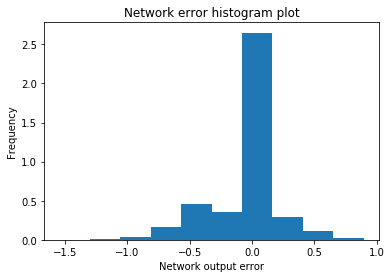

Error; maximal over inputs, average over dropout:
True values array mean: 0.146580 variance 0.237665
Experiment 0.189688 Std 0.288009
Equation   0.338652 Std 0.600216
Tightness  56.0% Std 48.0%


(0.18968809, 0.28800875, 0.3386518576715975, 0.6002162187003993, 0.23766458)

In [2]:
np.random.seed(42)
RandomExperiment(N = [10, 5, 1], P = 0.1, KLips = 0.1, do_print = True).run(inputs = 20, repetitions = 10000, do_print = True, do_plot = True, do_tqdm = True)

In [3]:
Ls = range(2, 11)
results = [RandomExperiment(P = 0.01, N = [10] * L + [1], KLips = 0.1).run(inputs = 5, do_tqdm = False, do_plot = False, do_print = False) for L in tqdm(Ls)]

100%|██████████| 9/9 [00:39<00:00,  4.41s/it]


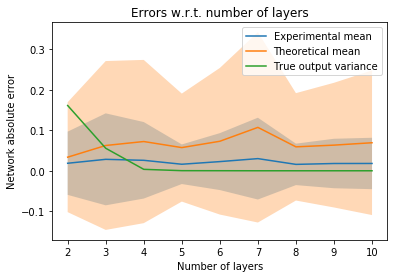

In [4]:
mean_exp, std_exp, mean_bound, std_bound, std_true = [np.array(x) for x in zip(*results)]
plt.figure()
plt.title('Errors w.r.t. number of layers')
plt.xlabel('Number of layers')
plt.ylabel('Network absolute error')
plt.plot(Ls, mean_exp, label = 'Experimental mean')
plt.fill_between(Ls, mean_exp - std_exp, mean_exp + std_exp, alpha = 0.3)
plt.plot(Ls, mean_bound, label = 'Theoretical mean')
plt.fill_between(Ls, mean_bound - std_bound, mean_bound + std_bound, alpha = 0.3)
plt.plot(Ls, std_true, label = 'True output variance')
plt.legend()
plt.show()

# Looking for the worst input

Mean error 0.26690, 61.39% from theoretical, norm 0.77
Mean error 0.28546, 65.66% from theoretical, norm 0.88
Mean error 0.29288, 67.36% from theoretical, norm 1.00
Mean error 0.31475, 72.39% from theoretical, norm 1.14
Mean error 0.31650, 72.80% from theoretical, norm 1.29
Mean error 0.32485, 74.72% from theoretical, norm 1.38
Mean error 0.34097, 78.42% from theoretical, norm 1.51
Mean error 0.34262, 78.80% from theoretical, norm 1.63
Mean error 0.34886, 80.24% from theoretical, norm 1.74
Mean error 0.35445, 81.52% from theoretical, norm 1.93
Mean error 0.35431, 81.49% from theoretical, norm 2.04
Mean error 0.35682, 82.07% from theoretical, norm 2.08
Mean error 0.35920, 82.62% from theoretical, norm 2.19
Mean error 0.36863, 84.79% from theoretical, norm 2.24
Mean error 0.36904, 84.88% from theoretical, norm 2.24
Mean error 0.36892, 84.85% from theoretical, norm 2.28
Mean error 0.36236, 83.34% from theoretical, norm 2.33
Mean error 0.37004, 85.11% from theoretical, norm 2.42
Mean error

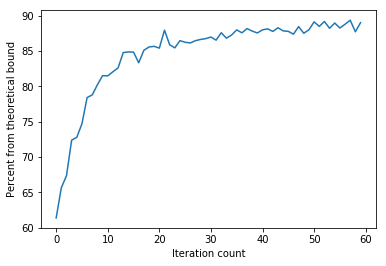

In [7]:
# Trying genetic search for x
np.random.seed(42)

# Setting parameters and creating the experiment
N = 5
L = 2
p = 0.1
K_ = 0.1
repetitions = 10000
to_add = 10
to_keep = 5
experiment = RandomExperiment([N] * L + [1], [p] * (L - 1), K_)

mean_bound, std_bound = experiment.get_mean_std_error()

# creating initial inputs
data = np.random.randn(to_keep, N)

# percents from theoretical bound
percents = []

maxiter = 60

for _ in range(maxiter):
  data_ = data

  # Randomizing inputs
  for input_ in data_:
    rand_direction = np.random.randn(to_add, N)
    rand_direction /= np.linalg.norm(rand_direction, axis = 0)
    rand_direction *= 0.5
    input_ = input_ + rand_direction
    data = np.vstack((data, input_))

  # Computing true values
  trues = [experiment.predict_no_dropout(value) for value in data]

  # Running the experiment
  errors = [experiment.get_error(value, repetitions = repetitions) for value in data]

  # List of errors for inputs
  error_array = np.mean(np.max(np.abs(errors), axis = 2), axis = 1)

  max_exp = np.max(error_array)
  
  # Choosing maximal error
  indices = np.argsort(-error_array)

  # Choosing best to_keep entries
  data = data[indices[:to_keep]]
  
  percent = 100 * max_exp / mean_bound
  print('Mean error %.5f, %.2f%% from theoretical, norm %.2f' % (max_exp, percent, np.linalg.norm(data.flatten()) / data.shape[0]))
  percents.append(percent)
  
plt.xlabel('Iteration count')
plt.ylabel('Percent from theoretical bound')
plt.plot(percents)
plt.show()

In [8]:
# Trying genetic search for x
np.random.seed(42)

# Setting parameters and creating the experiment
N = 5
L = 2
p = 0.1
K_ = 0.1
repetitions = 10000
to_add = 10
to_keep = 5
experiment = RandomExperiment([N] * L + [1], [p] * (L - 1), K_)

mean_bound, std_bound = experiment.get_mean_std_error()

# creating initial inputs
data = np.random.randn(to_keep, N)

# percents from theoretical bound
percents_mean = []
percents_std = []

maxiter = 30

for _ in range(maxiter):
  data_ = data

  # Randomizing inputs
  for input_ in data_:
    rand_direction = np.random.randn(to_add, N)
    rand_direction /= np.linalg.norm(rand_direction, axis = 0)
    rand_direction *= 0.5
    input_ = input_ + rand_direction
    data = np.vstack((data, input_))

  # Computing true values
  trues = [experiment.predict_no_dropout(value) for value in data]

  # Running the experiment
  errors = [experiment.get_error(value, repetitions = repetitions) for value in data]

  # List of errors for inputs
  error_std_array  = np.std(np.max(np.abs(errors), axis = 2), axis = 1)
  error_mean_array = np.mean(np.max(np.abs(errors), axis = 2), axis = 1)

  max_std_exp = np.max(error_std_array)
  max_mean_exp = np.max(error_mean_array)
  
  # Choosing maximal error
  indices = np.argsort(-error_std_array)

  # Choosing best to_keep entries
  data = data[indices[:to_keep]]
  
  percent_mean = 100 * max_mean_exp / mean_bound
  percent_std = 100 * max_std_exp / std_bound
  print('Mean error %.5f, %.2f%% from theoretical, Std error %.5f, %.2f%% from theoretical, norm %.2f' % (
      max_mean_exp, percent_mean, max_std_exp, percent_std, np.linalg.norm(data.flatten()) / data.shape[0]))
  percents_mean.append(percent_mean)
  percents_std.append(percent_std)

Mean error 0.26690, 61.39% from theoretical, Std error 0.45866, 55.14% from theoretical, norm 0.81
Mean error 0.28546, 65.66% from theoretical, Std error 0.47587, 57.21% from theoretical, norm 0.92
Mean error 0.29999, 69.00% from theoretical, Std error 0.49407, 59.39% from theoretical, norm 1.05
Mean error 0.30464, 70.07% from theoretical, Std error 0.51341, 61.72% from theoretical, norm 1.20
Mean error 0.31498, 72.45% from theoretical, Std error 0.53342, 64.12% from theoretical, norm 1.35
Mean error 0.31980, 73.56% from theoretical, Std error 0.54375, 65.37% from theoretical, norm 1.47
Mean error 0.33508, 77.07% from theoretical, Std error 0.56433, 67.84% from theoretical, norm 1.57
Mean error 0.33944, 78.07% from theoretical, Std error 0.57169, 68.72% from theoretical, norm 1.69
Mean error 0.34434, 79.20% from theoretical, Std error 0.57928, 69.64% from theoretical, norm 1.78
Mean error 0.34839, 80.13% from theoretical, Std error 0.58853, 70.75% from theoretical, norm 1.90
Mean error

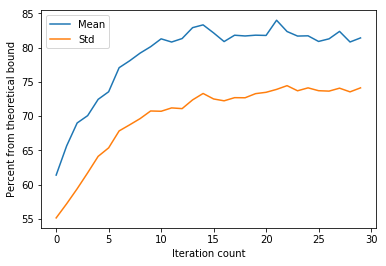

In [9]:
plt.xlabel('Iteration count')
plt.ylabel('Percent from theoretical bound')
plt.plot(percents_mean, label='Mean')
plt.plot(percents_std, label='Std')
plt.legend()
plt.show()